<a href="https://colab.research.google.com/github/margamvinay7/Generative-AI/blob/main/ConvolutionDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

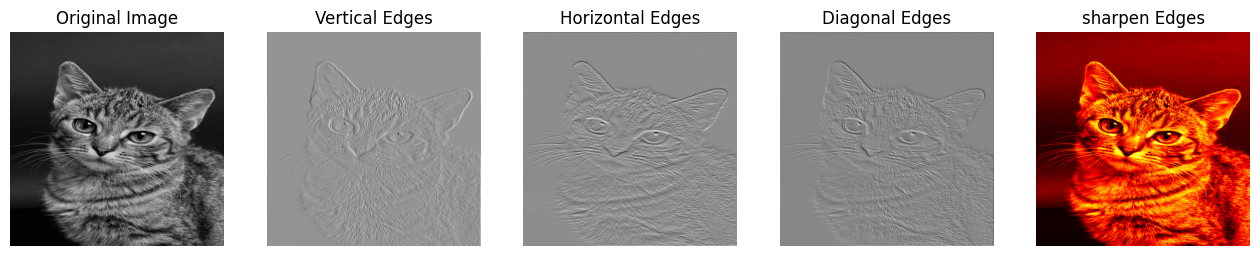

In [23]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load an image using PIL
image = Image.open("catsample.jpg").convert("L")  # Load as grayscale
image = image.resize((512, 512))  # Resize for simplicity
image = np.array(image, dtype=np.float32) / 255.0  # Convert to float32 and normalize

# Add batch and channel dimensions (1, 256, 256, 1)
image = np.expand_dims(image, axis=(0, -1))

# Define vertical and horizontal edge detection filters (Sobel-like)
vertical_filter = np.array([[1, 0, -1],
                            [1, 0, -1],
                            [1, 0, -1]], dtype=np.float32)

horizontal_filter = np.array([[1,  1,  1],
                              [0,  0,  0],
                              [-1, -1, -1]], dtype=np.float32)
diagonal_filter = np.array([[0,  1,  2],
                            [-1,  0,  1],
                            [-2, -1, 0]], dtype=np.float32)

sharpen_filter = np.array([[0, -1,  0],
                           [-1, 1000, -1],
                           [0, -1,  0]], dtype=np.float32)



# Reshape filters for TensorFlow (H, W, in_channels, out_channels)
vertical_filter = vertical_filter.reshape(3, 3, 1, 1)
horizontal_filter = horizontal_filter.reshape(3, 3, 1, 1)
diagonal_filter = diagonal_filter.reshape(3, 3, 1, 1)
sharpen_filter = sharpen_filter.reshape(3, 3, 1, 1)


# Apply convolution
vertical_edges = tf.nn.conv2d(image, vertical_filter, strides=[1, 1, 1, 1], padding="SAME")
horizontal_edges = tf.nn.conv2d(image, horizontal_filter, strides=[1, 1, 1, 1], padding="SAME")
diagonal_edges = tf.nn.conv2d(image, diagonal_filter, strides=[1, 1, 1, 1], padding="SAME")
sharpen_edges = tf.nn.conv2d(image, sharpen_filter, strides=[1, 1, 1, 1], padding="SAME")

# Convert tensors to numpy for visualization
vertical_edges = vertical_edges.numpy().squeeze()
horizontal_edges = horizontal_edges.numpy().squeeze()
diagonal_edges = diagonal_edges.numpy().squeeze()
sharpen_edges = sharpen_edges.numpy().squeeze()

# Plot original and filtered images
plt.figure(figsize=(16, 8))
plt.subplot(1, 5, 1)
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(vertical_edges, cmap="gray")
plt.title("Vertical Edges")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(horizontal_edges, cmap="gray")
plt.title("Horizontal Edges")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(diagonal_edges, cmap="gray")
plt.title("Diagonal Edges")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(sharpen_edges, cmap="hot")
plt.title("sharpen Edges")
plt.axis("off")

plt.show()

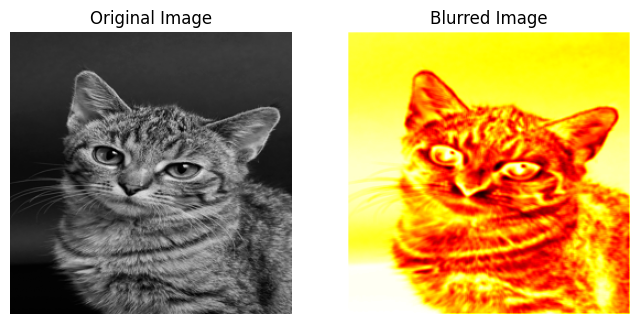

In [37]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load an image using PIL
image = Image.open("catsample.jpg").convert("L")  # Convert to grayscale
image = image.resize((256, 256))  # Resize for simplicity
image = np.array(image, dtype=np.float32) / 255.0  # Normalize to range [0,1]

# Add batch and channel dimensions (1, 256, 256, 1)
image = np.expand_dims(image, axis=(0, -1))

# Define a 3x3 blurring filter (averaging kernel)
blur_filter = np.array([[-1, -1, -1],
                        [-1, -1, -1],
                        [-1, -1, -1]], dtype=np.float32)

# Reshape the filter for TensorFlow (H, W, in_channels, out_channels)
blur_filter = blur_filter.reshape(3, 3, 1, 1)

# Apply convolution for blurring
blurred_image = tf.nn.conv2d(image, blur_filter, strides=[1, 1, 1, 1], padding="SAME")

# Convert tensor to numpy for visualization
blurred_image = blurred_image.numpy().squeeze()

# Plot original and blurred images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap="hot")
plt.title("Blurred Image")
plt.axis("off")

plt.show()